# Exercise 4.10.1 Coding Etiquette & Excel Reporting

Script Contents:

1. Import libraries
2. Data Security and Privacy
3. IC Regional Analysis
4. Exclusion Flag for Low Activity Customers

# 01. Import Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path to InstaCart folders

path = r"C:\Users\ivand\OneDrive\Desktop\Careerfoundry\IT_Instacart Baskey Analysis"

In [3]:
# import orders_products_customers_merged.pkl from Prepared Data folder

df_ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 02. Data Security and Privacy

In [4]:
# check output

df_ords_prods_cust_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,sex,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity


In [5]:
# check shape

df_ords_prods_cust_merge.shape

(32404859, 33)

In [6]:
# No PII data (names, email addresses, physical addresses, or phone numbers) are present in the dataset. 
# Names of customers were removed in the prior exercise.

# 03. IC Regional Analysis

In [7]:
# 03(a) The Instacart officers are interested in comparing customer behavior in different geographic areas.
# Create a new 'region' column based on the state column.

In [8]:
# results for the new 'region' column

results_region = []

for value in df_ords_prods_cust_merge["state"]:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    results_region.append("Northeast")
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    results_region.append("Midwest")
  elif value == 'Delaware' or value == 'Maryland' or value == 'District of Colombia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Lousiana':
    results_region.append("South")
  else:
    results_region.append("West")

In [9]:
# Add results_region to dataframe in new column

df_ords_prods_cust_merge['region'] = results_region

In [10]:
# check output of new column 'region'

df_ords_prods_cust_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,sex,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity


In [11]:
# check frequency of 'region'

df_ords_prods_cust_merge['region'].value_counts(dropna=False)

region
West         9544090
South        9540708
Midwest      7597325
Northeast    5722736
Name: count, dtype: int64

In [12]:
# 03(b) Determine whether there’s a difference in spending habits between the different U.S. regions. 
# Cross the region variable spending flag

# check frequency of 'spending_flag'
df_ords_prods_cust_merge['spending_flag'].value_counts(dropna=False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [13]:
# create crosstab

regional_spending_habits = pd.crosstab(df_ords_prods_cust_merge['region'], df_ords_prods_cust_merge['spending_flag'], dropna = False)

In [14]:
regional_spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,186840,9353868
West,183205,9360885


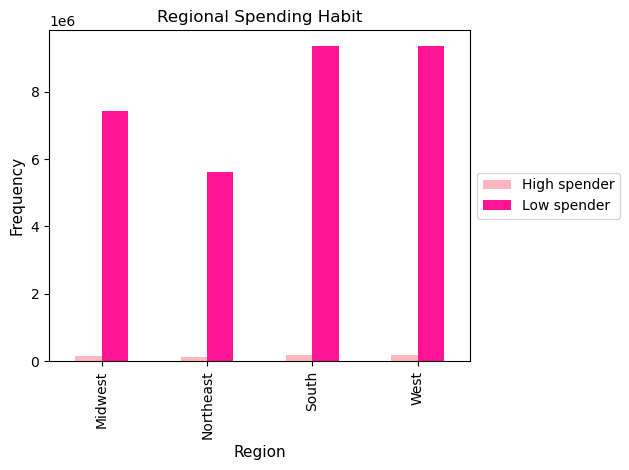

In [15]:
# Create a bar chart of the above 'regional_spending_habits' crosstab

bar_regional_spending_habit=regional_spending_habits.plot.bar(color=['lightpink','deeppink'])
plt.xlabel("Region", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.title("Regional Spending Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [16]:
# export Regional Spending Habit to visualizations folder

bar_regional_spending_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_spending_habit.png'))

# 04. Exclusion Flag for Low Activity Customers

In [17]:
# 04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [18]:
# Set low_activity flag

df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] < 5, 'activity_flag'] = 'low activity'

In [19]:
# Set normal_activity flag

df_ords_prods_cust_merge.loc[df_ords_prods_cust_merge['max_order'] >= 5, 'activity_flag'] = 'normal activity'

In [20]:
# check output

df_ords_prods_cust_merge['activity_flag'].value_counts(dropna=False)

activity_flag
normal activity    30964564
low activity        1440295
Name: count, dtype: int64

In [21]:
# export full ords_prods_cust_merge dataset with the new 'activity flag' column

df_ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged.pkl'))

In [22]:
# create new sample without the 'low activity' customers

df_2 = df_ords_prods_cust_merge[df_ords_prods_cust_merge['activity_flag']=='normal activity']

In [23]:
df_2.shape

(30964564, 33)

In [24]:
# New sample df_2 has same # of rows as the 'normal activity' flags - 30964564

In [25]:
# export df_2 sample without the 'low activity' customers

df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_normact_merged.pkl'))